## Mercedes Araba Fiyat Tahmini

### Gerekli kütüphaneler

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Notebook ile aynı klasörde olan verimizi pandas ile okutalım ve df değişkenine kaydedelim

In [2]:
df = pd.read_excel("merc.xlsx")

Veri setine genel bir bakış

In [3]:
df

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0
...,...,...,...,...,...,...,...
13114,2020,35999,Automatic,500,145,55.4,2.0
13115,2020,24699,Automatic,2500,145,55.4,2.0
13116,2019,30999,Automatic,11612,145,41.5,2.1
13117,2019,37990,Automatic,2426,145,45.6,2.0


Veri seti 13119 sutundan ve 7 kolondon oluşmakta

In [4]:
df.columns

Index(['year', 'price', 'transmission', 'mileage', 'tax', 'mpg', 'engineSize'], dtype='object')

#### Veri setinin içerdiği arabaların özellikleri
|İngilizcesi|Türkçesi|Veri Tipi|
|--------|-----------|---------|
|year|yıl|int64|
|price|fiyat|int64|
|transmission|vites türü|object|
|mileage|mil/kilometre|int64|
|tax|vergi|int64|
|mpg|yakıt tüketimi|float64|
|engineSize|motor hacmi|float64|

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          13119 non-null  int64  
 1   price         13119 non-null  int64  
 2   transmission  13119 non-null  object 
 3   mileage       13119 non-null  int64  
 4   tax           13119 non-null  int64  
 5   mpg           13119 non-null  float64
 6   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(1)
memory usage: 717.6+ KB


In [6]:
# verimizde hangi veri tipinden kaç tane var
df.dtypes.value_counts()

int64      4
float64    2
object     1
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,13119.0,2017.296288,2.224709,1970.0,2016.0,2018.0,2019.0,2020.0
price,13119.0,24698.596920,11842.675542,650.0,17450.0,22480.0,28980.0,159999.0
mileage,13119.0,21949.559037,21176.512267,1.0,6097.5,15189.0,31779.5,259000.0
tax,13119.0,129.972178,65.260286,0.0,125.0,145.0,145.0,580.0
mpg,13119.0,55.155843,15.220082,1.1,45.6,56.5,64.2,217.3
engineSize,13119.0,2.071530,0.572426,0.0,1.8,2.0,2.1,6.2


Veri tipi sayısal olmadığı için betimsel istatistiklerde 'transmission' kolonu gözükmez 

Betimsel istatistiklerden çıkarabileceğimiz bazı gözlemler:
+ En yüksek modele sahip araba 2020, en düşük modele sahip araba 1970 modelidir.
+ Arabaların ortalama modeli 2017 buradan daha güncel model ağırlıklı bir veri olduğunu anlayabiliriz.
+ En yüksek fiyatlı araba 160000 paund iken en düşük fiyatlı araba 650 paunddur.
+ Arabaların ortalama fiyatı 25000 paunddur. En yüksek ve en düşük fiyatlar ortalamadan çok uzakta veride aykırı değerler olabilir.
+ En düşük vergi değeri 0, herhangi bir arabanın vergisi 0 olabilir mi? Şüpheli bir değer.
+ Galon başına en düşük 1.1 mil, en yüksek 217.3 mil 
+ En yüksek motor hacmi 6.2 ve en düşük motor hacmi 0 motor hacmi 0 olamaz, incelenmeli.

In [8]:
# eksik değer var mı?
df.isnull().sum()

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

Veri setinde eksik değer yok

In [9]:
# tekrar eden satır var mı?
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
13114    False
13115    False
13116    False
13117    False
13118    False
Length: 13119, dtype: bool

In [10]:
# toplam tekrar eden satır sayısı
df.duplicated().sum()

259

13119 satırdan 259 tanesi tekrar ediyor

In [11]:
df = df.drop_duplicates(keep='first').reset_index(drop=True)

İlk rastlanan çift kayıtı tekil kabul ettik ve geri kalan tekrarlıları sildik.

In [12]:
df.shape

(12860, 7)

Tekrar eden sutunları silme işleminden sonra 12860 sutun kaldı

In [13]:
# en yüksek fiyatlı 15 araba
df.sort_values("price", ascending=False).head(15)

,year,price,transmission,mileage,tax,mpg,engineSize
6103,2020,159999,Semi-Auto,1350,145,21.4,4.0
9799,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8543,2019,140319,Semi-Auto,785,150,22.1,4.0
6289,2018,139995,Semi-Auto,13046,145,21.4,4.0
8,2019,139948,Automatic,12000,145,21.4,4.0
8911,2019,139559,Semi-Auto,1000,145,22.1,4.0
8621,2020,138439,Semi-Auto,1000,145,22.1,4.0
5807,2018,135771,Semi-Auto,19000,145,21.4,4.0
7717,2018,135124,Semi-Auto,18234,150,21.4,4.0


In [14]:
# en düşük fiyatlı 15 araba
df.sort_values("price", ascending=True).head(15)

,year,price,transmission,mileage,tax,mpg,engineSize
11559,2003,650,Manual,109090,235,40.0,1.4
11751,2010,1350,Manual,116126,145,54.3,2.0
11508,2000,1490,Automatic,87000,265,27.2,3.2
11293,2002,1495,Automatic,13800,305,39.8,2.7
12337,2004,1495,Manual,119000,300,34.5,1.8
12453,2006,1695,Automatic,153000,300,33.6,1.8
10918,2001,1695,Automatic,108800,325,31.7,3.2
12509,2004,1780,Automatic,118000,265,41.5,2.2
11752,2007,1800,Automatic,84000,200,42.8,1.5
11507,1998,1990,Automatic,99300,265,32.1,2.3


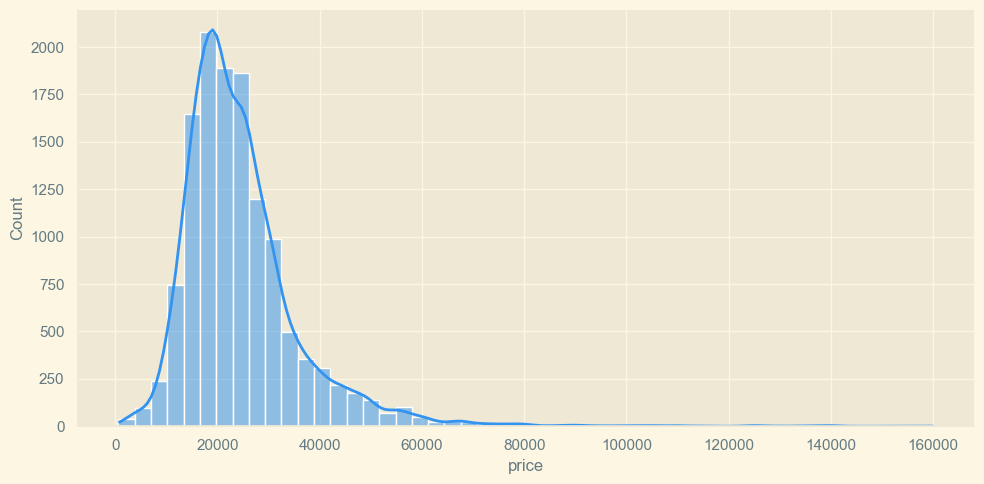

In [15]:
sns.set()
plt.style.use("Solarize_Light2")
sns.displot(df["price"], bins=50, aspect=2, kde=True, color="#3293f0")

Fiyatların dağılımına bakıldığı zaman sağ kuyruk normal dağılıma göre fazlasıyla uzun duruyor. Veride aykırı değerler var.

<AxesSubplot: xlabel='price'>

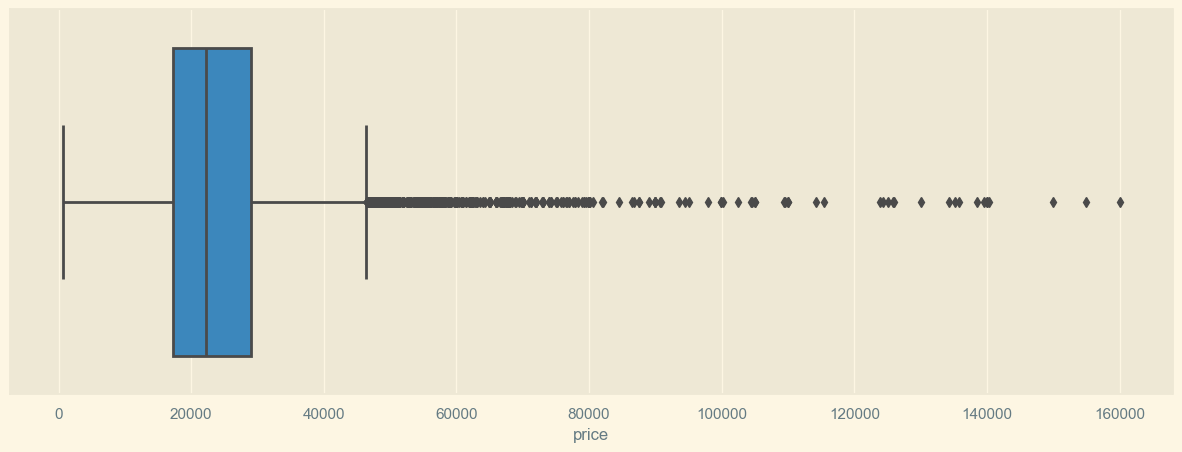

In [16]:
plt.figure(figsize=(15,5))
sns.boxplot(x="price",data=df)

Kutu grafiğinden görüldüğü üzere birçok aykırı değer var. Genelde verinin %99'unu aldğımız zaman verinin genel yapısından çok kaybetmemiş oluyoruz. Kuracağımız modelin daha anlamlı olabilmesi için verinin %1'lik kısmını bırakıcağız. 

In [17]:
# verinin %1'i 128.6 değere tekabül ediyormuş
len(df) * 0.01

128.6

In [18]:
df = df.sort_values(["price"],ascending=False).iloc[128:]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12732 entries, 7592 to 11559
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          12732 non-null  int64  
 1   price         12732 non-null  int64  
 2   transmission  12732 non-null  object 
 3   mileage       12732 non-null  int64  
 4   tax           12732 non-null  int64  
 5   mpg           12732 non-null  float64
 6   engineSize    12732 non-null  float64
dtypes: float64(2), int64(4), object(1)
memory usage: 795.8+ KB


Verimizdeki aşırı aykırı olan %1'lik kısımı attıktan sonra 12732 satırımız kaldı.

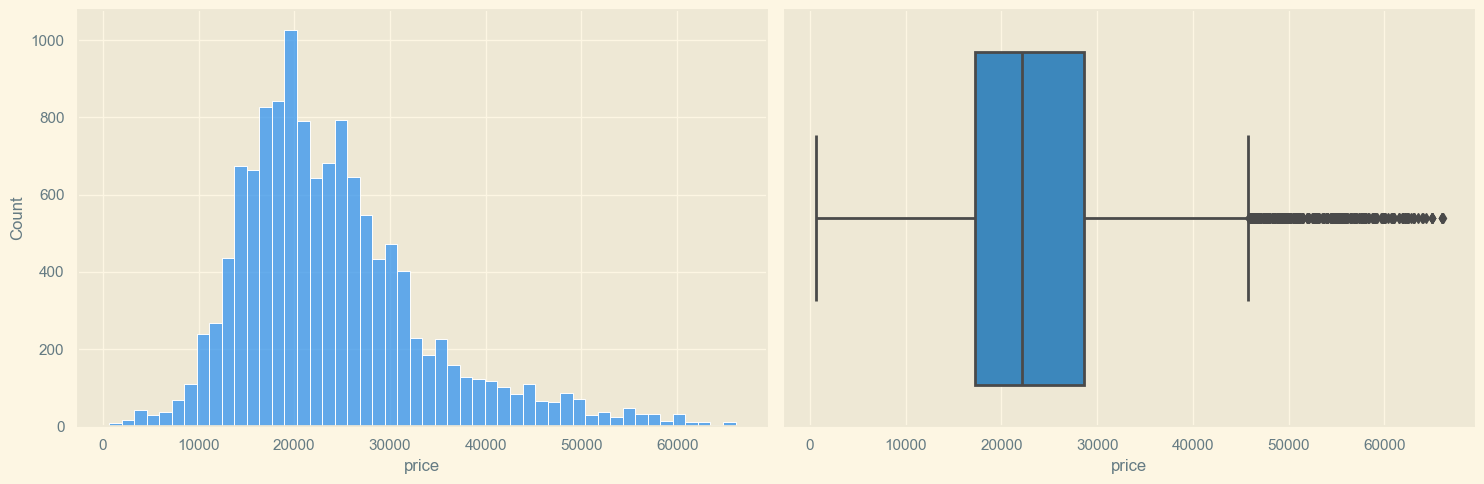

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={"width_ratios":[1, 1]})

sns.histplot(df["price"], bins=50, color="#3293f0", ax=ax[0])
sns.boxplot(x="price",data=df, ax=ax[1])

ax[0].set_xlabel("price")
ax[1].set_xlabel("price")

plt.tight_layout()
plt.show()

Tekrardan dağılımlara baktığımızda sayıların daha dengeli olduğunu görüyoruz.

[Text(0.5, 1.0, 'Yılların Dağılımı')]

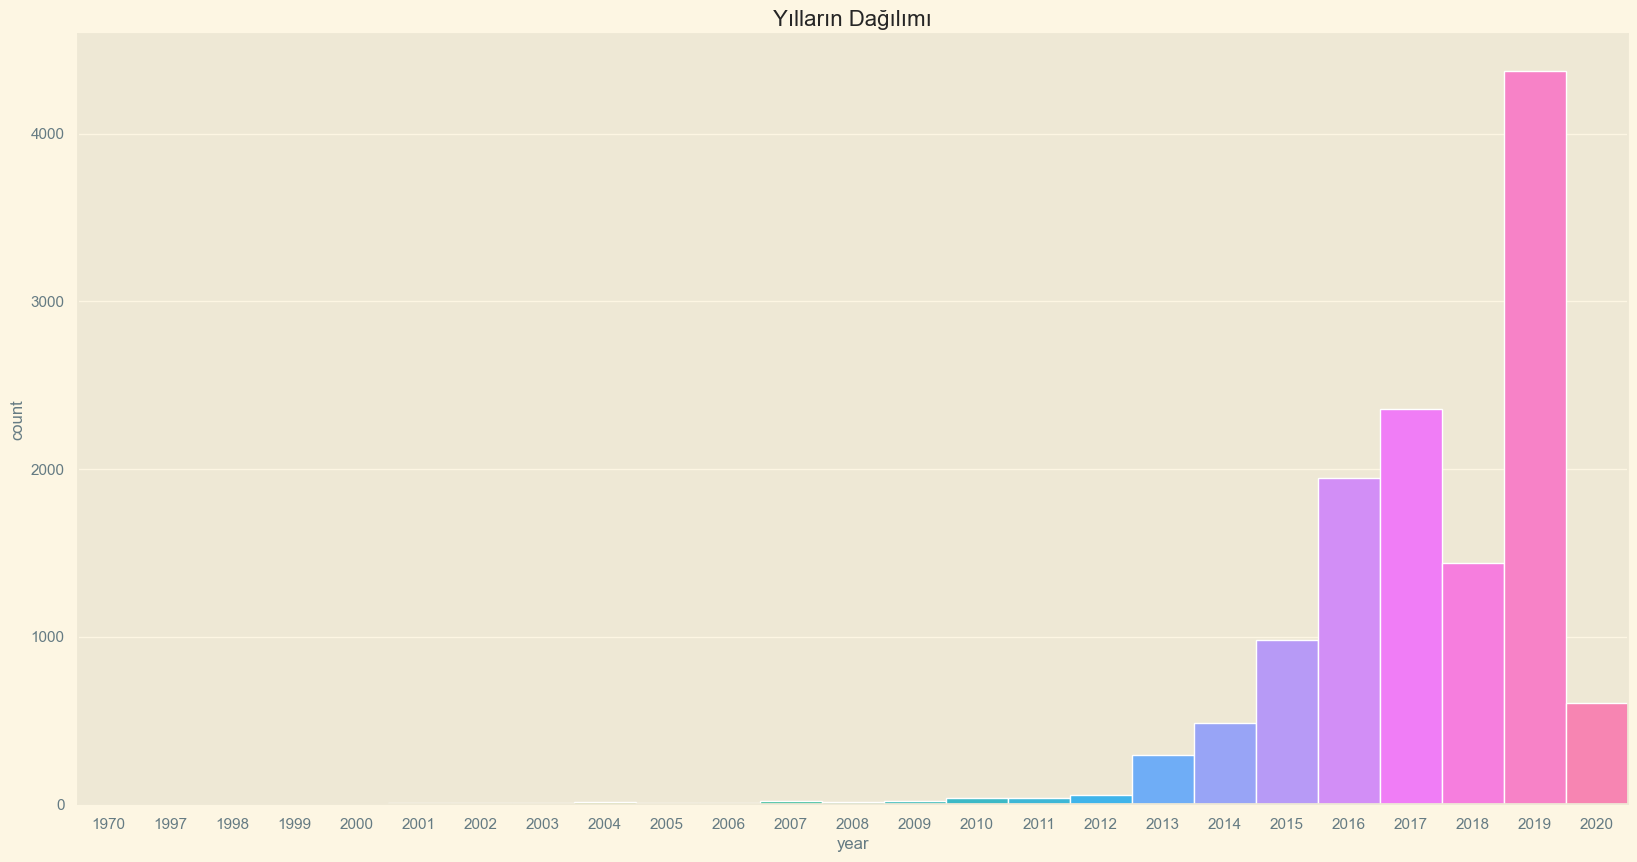

In [21]:
plt.figure(figsize=(20,10))
sns.countplot(x="year",data=df,width=1,saturation=1).set(title="Yılların Dağılımı")

Grafiğe baktığımız zaman 2019 model arabaların yoğunlukta olduğu görülüyor. 2012 ve daha düşük model arabaların sayısı oldukça az. Dağılıma genel anlamda baktığımızda ise sola çarpık bir dağılım gibi duruyor. 

In [22]:
df.groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11951.694158
2014    14062.160494
2015    16673.487755
2016    19219.158951
2017    21364.469716
2018    24814.733333
2019    30308.098743
2020    34806.579734
Name: price, dtype: float64

Yıllara göre fiyatların ortalamasına baktığımızda ise 1970 model arabaların ortalamasının beklenenden fazla olduğu görülüyor.

In [23]:
# 1970 model arabalara bakalım
df[df.year==1970]

,year,price,transmission,mileage,tax,mpg,engineSize
11815,1970,24999,Automatic,14000,305,39.2,0.0


1 adet araba modeli karşımıza çıkıyor. Antika bir araba olabilir. Arabanın engineSize özelliği 0 gözüküyor, motor hacmi sıfır olabilir mi?

In [24]:
# motor hacmi 0 olanlara bakalım
df[df.engineSize==0]

,year,price,transmission,mileage,tax,mpg,engineSize
11815,1970,24999,Automatic,14000,305,39.2,0.0
10927,2018,22738,Automatic,24000,150,61.4,0.0
9375,2018,20500,Automatic,13386,145,53.3,0.0
9406,2016,18700,Other,30895,125,56.5,0.0
10559,2017,18000,Automatic,33282,145,68.9,0.0
9377,2018,18000,Automatic,18347,150,65.7,0.0
9410,2016,17800,Automatic,21913,20,68.9,0.0
9374,2016,17500,Automatic,29712,20,68.9,0.0
10454,2018,17500,Automatic,19796,145,74.3,0.0
10419,2016,16500,Automatic,26955,30,70.6,0.0


In [25]:
len(df[df.engineSize==0])

12

12 adet aracın engineSize özelliği 0. Herhangi bir aracın motor hacmi 0 olamayacağı için bu değerleri veriden atacağız.

In [26]:
# verimizi motor hacmi 0'a eşit olmayan verilere eşitliyoruz yani 0 alanları atıyoruz
df = df[df.engineSize != 0]

In [27]:
df.sort_values("engineSize",ascending=True)

,year,price,transmission,mileage,tax,mpg,engineSize
8481,2019,22299,Semi-Auto,11643,145,45.6,1.3
4795,2019,21980,Semi-Auto,9350,145,45.6,1.3
2718,2019,21980,Manual,16,145,28.5,1.3
10129,2020,28900,Automatic,1060,145,53.3,1.3
12611,2020,28900,Automatic,4308,145,44.1,1.3
...,...,...,...,...,...,...,...
9296,2013,22995,Semi-Auto,49964,570,23.0,6.2
897,2014,25885,Semi-Auto,37000,570,23.5,6.2
9756,2013,21999,Automatic,41866,570,23.5,6.2
226,2014,26998,Semi-Auto,24175,570,23.5,6.2


engineSize değeri 0 olan 12 satırı daha verimizden attık. 12720 satır kaldı.

,transmission
transmission,
Automatic,4735
Manual,1419
Other,1
Semi-Auto,6565


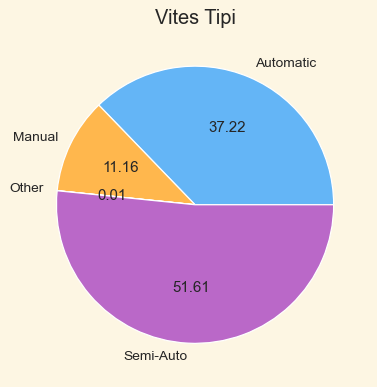

In [30]:
plt.figure(figsize=(5,5),dpi=90)
plt.title("Vites Tipi")
grup=df.groupby("transmission")["transmission"].agg("count")
display(grup.to_frame())
colors = ["#64b5f6", "#ffb74d", "#81c784", "#ba68c8"]
plt.pie(grup,labels=grup.index,autopct="%0.2f", colors=colors)
plt.show()


Vites türlerine baktığımızda 1 adet vites kategorilerine uymayan değer görüyoruz.

In [31]:
# vites türlerine bakalım
df["transmission"].unique()

array(['Semi-Auto', 'Automatic', 'Manual', 'Other'], dtype=object)

In [32]:
# vites türü other olan değere ulaşalım
df[df.transmission=="Other"]

,year,price,transmission,mileage,tax,mpg,engineSize
12505,2015,12995,Other,39000,150,56.5,2.1


Vites tipi other olan değeri modelin kalitesi için veriden atacağım.

In [33]:
df = df[df.transmission != "Other"]

In [34]:
df["transmission"].unique()

array(['Semi-Auto', 'Automatic', 'Manual'], dtype=object)

Vites türlerine tekrardan baktığımızda Other değerinin gittiğini görüyoruz.

In [54]:
df.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.600828,-0.750096,0.013321,-0.084780,-0.183518
price,0.600828,1.000000,-0.596197,0.294935,-0.419641,0.431153
mileage,-0.750096,-0.596197,1.000000,-0.152892,0.189928,0.099344
tax,0.013321,0.294935,-0.152892,1.000000,-0.520913,0.354697
mpg,-0.084780,-0.419641,0.189928,-0.520913,1.000000,-0.306220
engineSize,-0.183518,0.431153,0.099344,0.354697,-0.306220,1.000000


Mil ile yıl arasında güçlü sayılabilecek negatif bir ilişki var. Arabanın kilometresi/mili arttıkça modeli de haliyle daha düşük olacaktır. Onun dışında güçlü denebilecek bir ilişki gözüme çarpmadı.

In [55]:
# fiyat ile diğer değişkenlerin korelasyonu
df.corr()["price"].sort_values()

mileage      -0.596197
mpg          -0.419641
tax           0.294935
engineSize    0.431153
year          0.600828
price         1.000000
Name: price, dtype: float64

Fiyat ile yıl arasında pozitif bir ilişki var diyebiliriz. Fiyat arttıkça arabanın modeli de artıyor.

Fiyat ile arabanın kilometresi/mili arasında negatif bir ilişki olduğu söylenebilir. Arabanın kilometresi arttıkça fiyatı düşüyor. 

<AxesSubplot: >

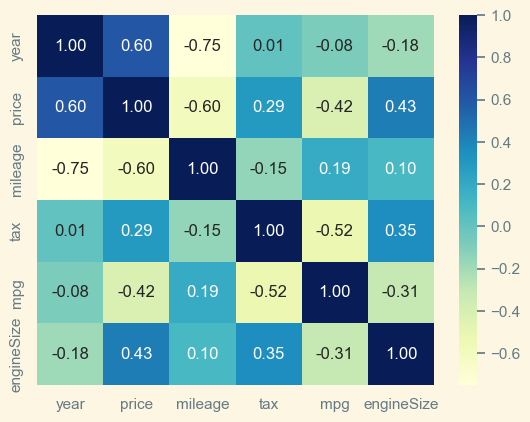

In [57]:
# Bir de ısı haritasına bakalım
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu",fmt=".2f")

Text(0, 0.5, 'Engine Size')

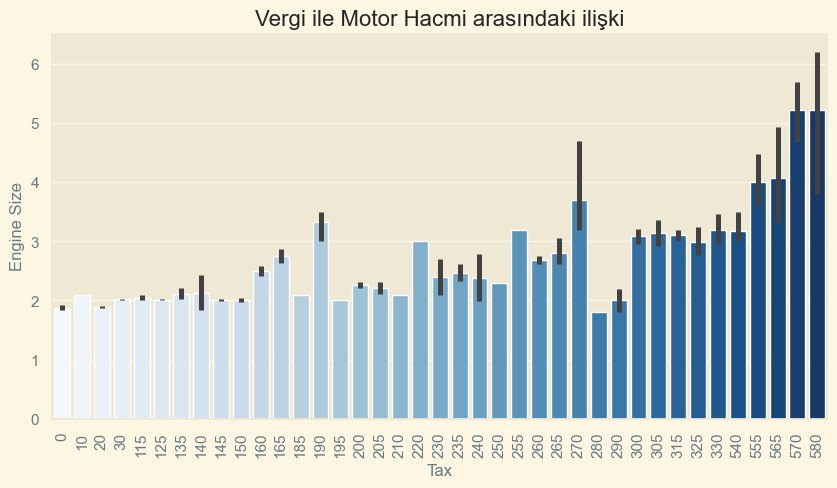

In [49]:
plt.figure(figsize=(10,5))
sns.barplot(x="tax",y="engineSize",data=df,palette="Blues")
plt.xticks(rotation=90)
plt.title("Vergi ile Motor Hacmi arasındaki ilişki")
plt.xlabel("Tax")
plt.ylabel("Engine Size")

Grafiğe genel olarak baktığımızda motor hacminin 5 ve üzerindeki arabaların vergisinin yüksek olduğunu görüyoruz.

Text(0, 0.5, 'Engine Size')

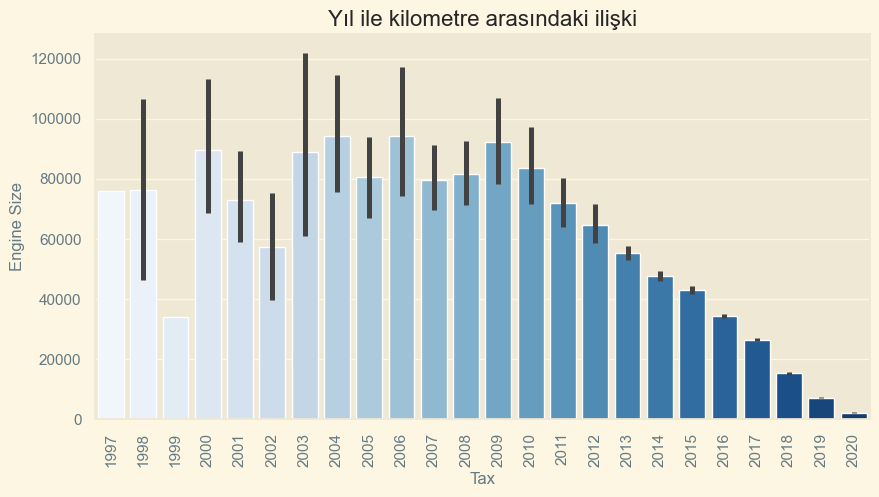

In [50]:
plt.figure(figsize=(10,5))
sns.barplot(x="year",y="mileage",data=df,palette="Blues")
plt.xticks(rotation=90)
plt.title("Yıl ile kilometre arasındaki ilişki")
plt.xlabel("Tax")
plt.ylabel("Engine Size")

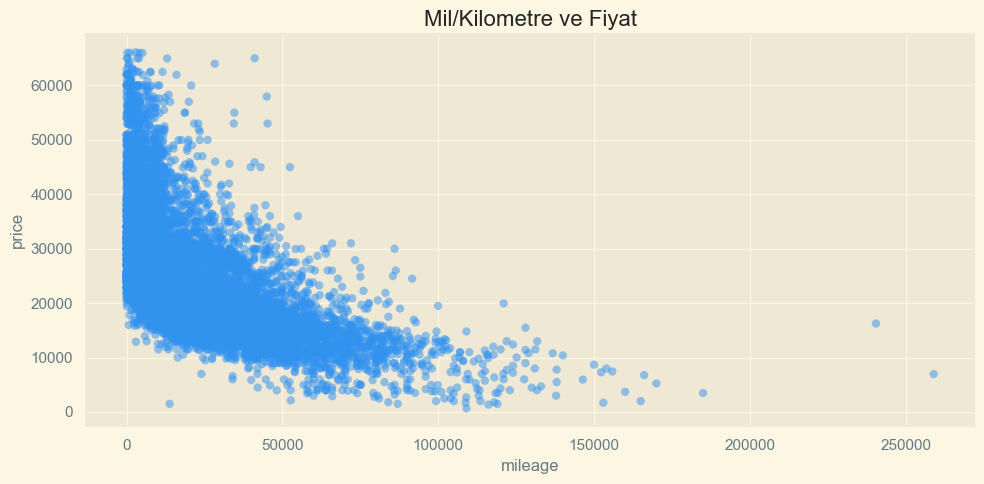

In [46]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="mileage",y="price",data=df, alpha=0.5, color="#3293f0", edgecolor="none")
plt.xlabel("mileage")
plt.ylabel("price")
plt.title("Mil/Kilometre ve Fiyat")
plt.tight_layout()

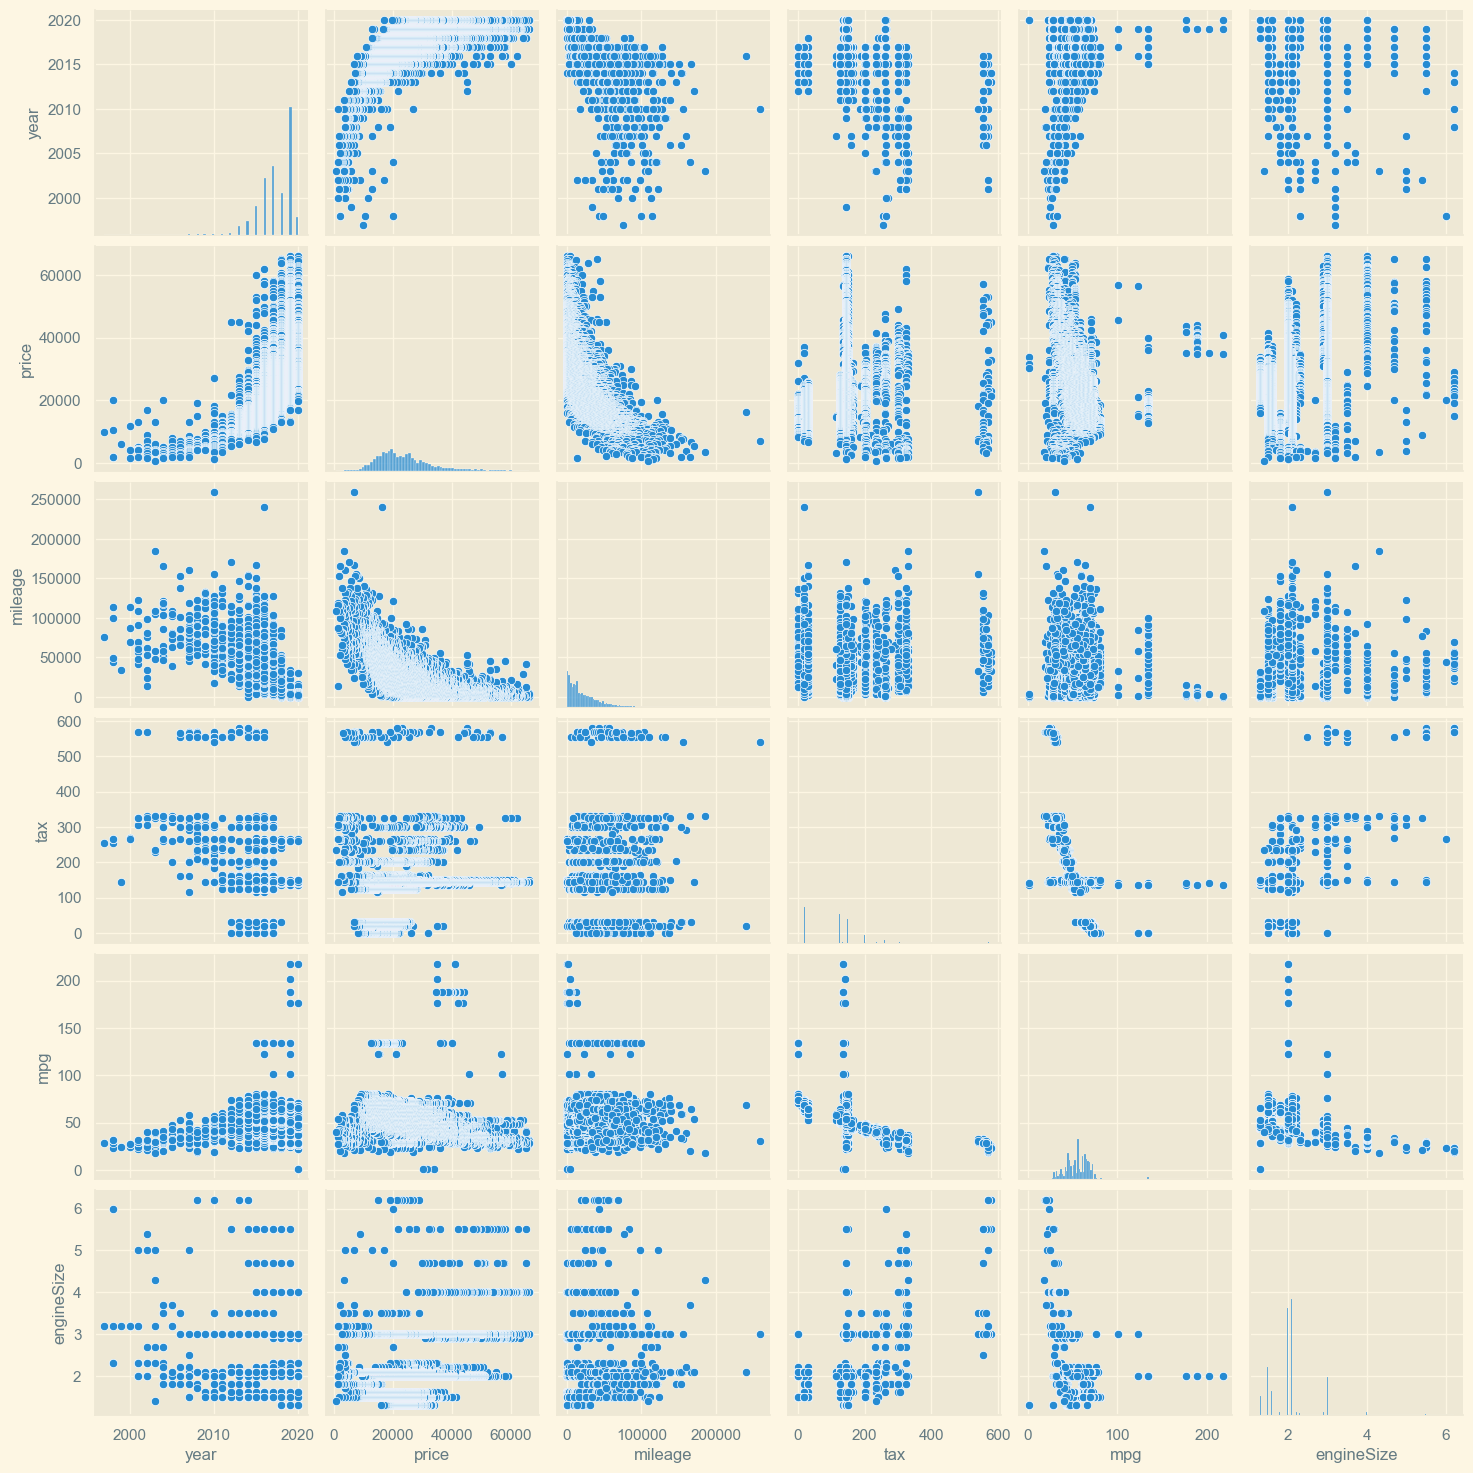

In [59]:
# Sayısal değişkenlere genel bir bakış 
sns.pairplot(df)

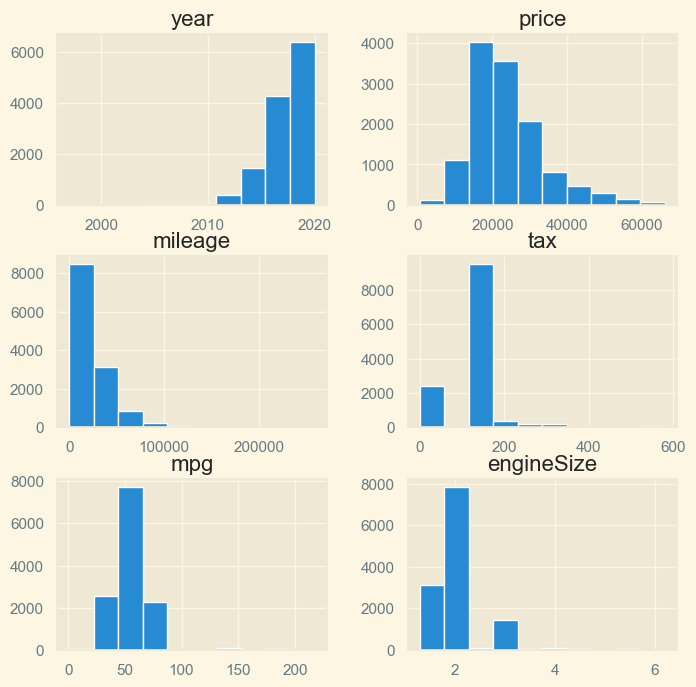

In [62]:
df.hist(figsize=(8,8));

In [63]:
df.columns

Index(['year', 'price', 'transmission', 'mileage', 'tax', 'mpg', 'engineSize'], dtype='object')

### Veri Dönüşümü
Verimizdeki transmission sutunu kategegorik değerlerden oluşuyor, modelimizin anlamlı olması için bunu nümerik değerlere çevireceğiz.df["transmission"].unique()

In [65]:
df["transmission"].unique()

array(['Semi-Auto', 'Automatic', 'Manual'], dtype=object)

In [66]:
# 3 adet kategorik değişken olduğundan ötürü çok sınıflı bir dönüşüm yapacağız
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()

+ Kategorik değişken yapısının hiyerarşik bir önem seviyesi olduğu için one-hot dönüşü yapmadan klasik dönüşüm ile kategorik verileri dönüştürebiliriz.

##### Automatic>Semi-Auto>Manual
Piyasa araştırması yaptığımda fiyata etkileri olarak yukarıdaki eşitliğe ulaşıyorum. Dolayısıyla kategorik değişkenlerin hiyerarşik bir önem seviyesi vardır.

|Değişken|Değer|
|--------|-----|
|Automatic|3|
|Semi-Auto|2|
|Manual|1|

In [69]:
# dönüşüm işlemi
df["yeni_transmission"] = df["transmission"].map({'Automatic': 3, 'Semi-Auto': 2, 'Manual': 1})

In [73]:
# kategorik olan transmission sutununu bırakıyoruz
df.drop(["transmission"], axis=1, inplace=True)

In [74]:
# verimizin dönüşümden sonraki hali
df.head()

,year,price,mileage,tax,mpg,engineSize,yeni_transmission
7592,2019,66099,2918,145,27.4,4.0,2
1924,2020,65995,200,145,31.7,3.0,2
6081,2019,65990,5076,150,30.4,3.0,2
5685,2020,65990,999,145,28.0,4.0,2
3163,2020,65980,3999,145,28.0,4.0,2
